In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Reading the data file and size inspection

In [3]:
df = pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.shape

(730, 16)

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Interpretation: The dataset has 730 rows and 16 columns.**

**"dteday" is a date type column, while others are numeric (integer or float).
Some numeric columns may be categorical. Further analysis will determine whether to convert them or retain as numeric.**

# Check for NULL/MISSING values

In [9]:
# percentage of missing values in each column

round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
# row-wise null count percentage
round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)


0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

**Interpretation: The dataset contains no missing or NULL values, indicating that all columns are complete.**

# Duplicate Check

In [11]:
df_dup = df.copy()
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(730, 16)

In [12]:
df.shape

(730, 16)

**Interpretation:**

**The dataset's shape remains unchanged after executing the drop duplicate command, indicating that there are no duplicate records present.**



# Data Cleaning

This process aids in detecting any unknown or invalid values present within the dataset.

In [14]:
df.value_counts(ascending=False).head(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985    1
Name: count, dtype: int64

**The dataset contains no junk or unknown values.**

# Dropping Unnecessary Columns

Some columns are removed as they are not needed for analysis:

instant: Just an index with no useful information.

dteday: Shows the date, but we already have separate columns for year and month, so it's not required.

casual and registered: Show bike counts for different customer types, but since we are focused on the total count, these are not needed. A new variable already captures the ratio of these categories.

Saving the Cleaned Data:
The updated dataset is saved as df_new, keeping the original data unchanged for future reference.

In [15]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Creating a new DataFrame, df_new, by removing the columns 'instant', 'dteday', 'casual', and 'registered'.**

In [17]:
df_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
               'atemp', 'hum', 'windspeed','cnt']]


In [18]:
df_new.shape

(730, 12)

# Convert int64 variables to categorical variables

In [19]:
# Check the datatypes before convertion
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**The columns 'season', 'mnth', 'weekday', and 'weathersit' are categorical variables, not int64. Therefore, they will be converted to categorical types for proper analysis.**

In [20]:
# Converting 'Season' to a categorical variable
df_new['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
df_new['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [21]:
# Converting 'mnth' to categorical variable 

import calendar

df_new['mnth'] = df_new['mnth'].apply(lambda x: calendar.month_abbr[x])
df_new['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [22]:
# Converting 'weekday' to objectin preparation for making dummy variable

df_new['weekday'] = df_new['weekday'].astype('object')

In [23]:
# Converting 'weathersit' to a categorical variable

df_new['weathersit']=df_new['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])
df_new['weathersit'].value_counts()

weathersit
Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: count, dtype: int64

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Univariate Analysis

Visualizing Binary Columns (Numerical Variables)

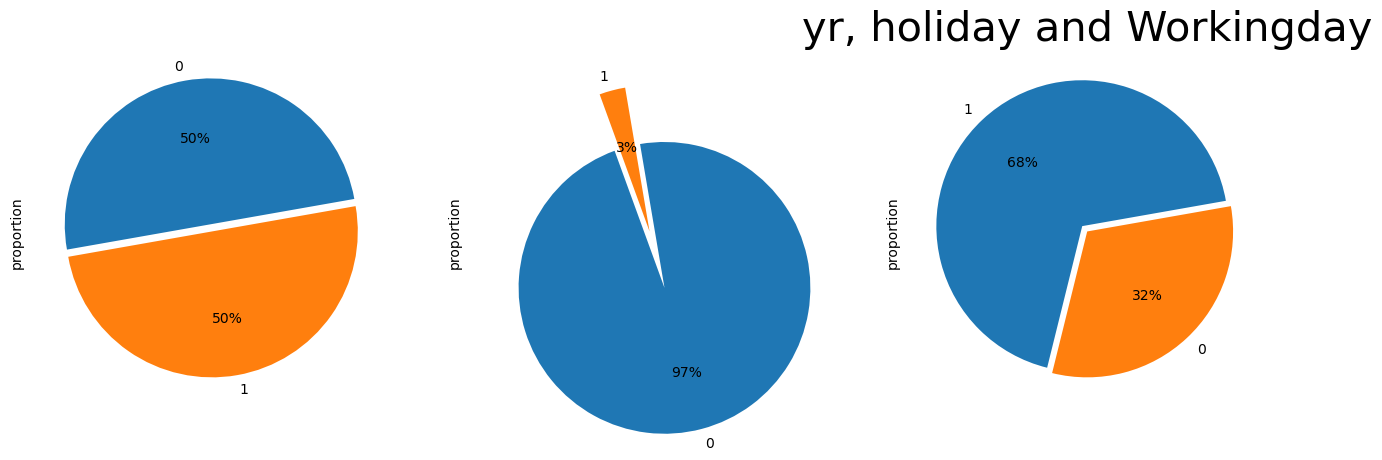

In [26]:
plt.figure(figsize = [16,15])
plt.subplot(131)
df_new['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
df_new['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
df_new['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

**Looking at the three pie charts, we can observe the following:**

**'Yr': The data shows an even split (50-50) for daily bike usage across the two years.**

**'Holiday': There are fewer holidays (1) compared to non-holidays (0), so bike usage is higher on non-holidays.**

**'Workingday': Since there are more working days than non-working days, bike usage is also higher on working days.**

# Visualizing Binary Columns (Categorical Variables)

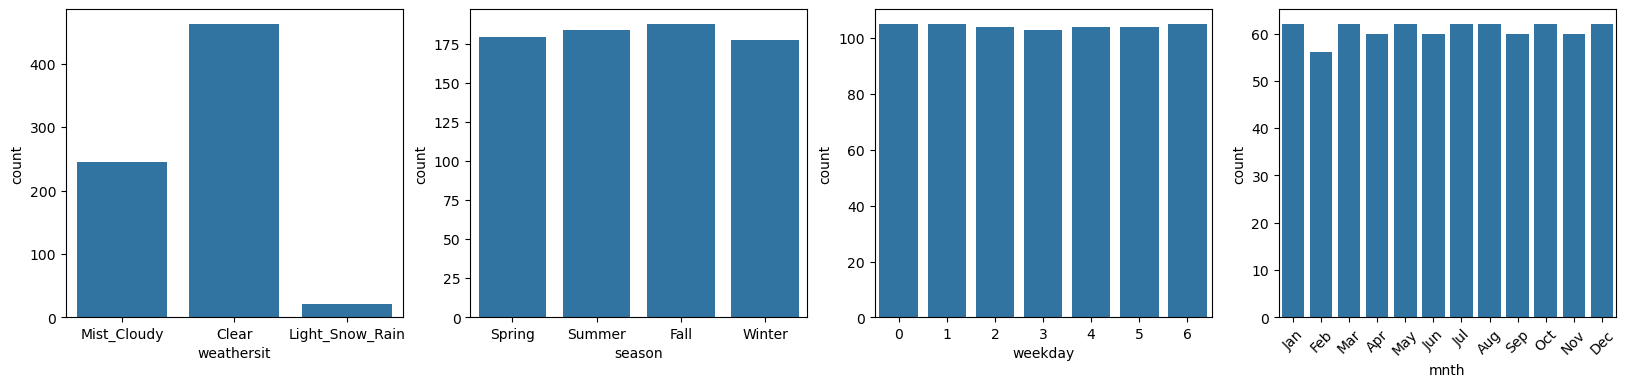

In [27]:
plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = df_new, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = df_new, x = 'season')
plt.subplot(143)
sns.countplot(data = df_new, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = df_new, x = 'mnth')
plt.show()

**From the plots, we can conclude the following:**

**Bike usage is higher when the 'weathersit' is Clear, Few clouds, or Partly cloudy.**

**For the other variables (season, weekday, and month), the values appear to be fairly similar, showing no significant variation.**

# Bivariate Analysis

Visualizing Numerical Variables vs 'cnt'

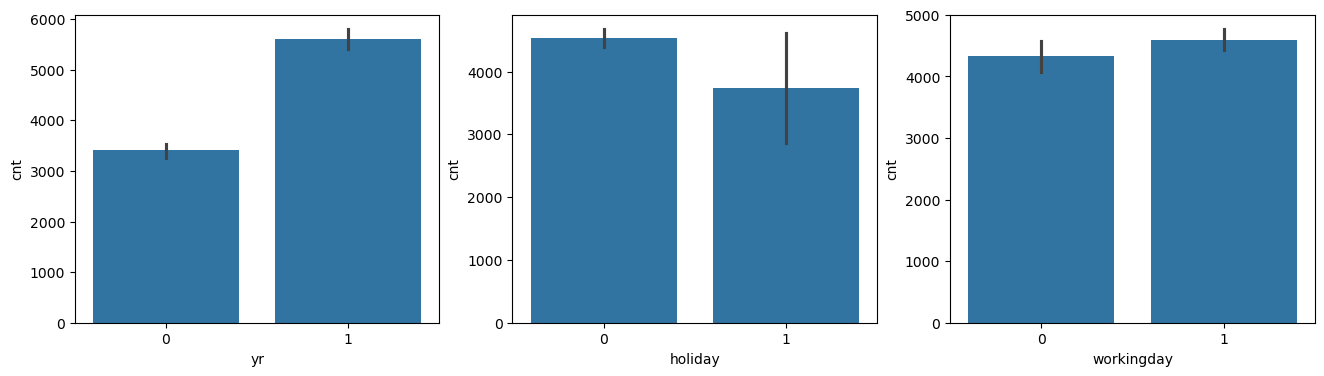

In [30]:
plt.figure(figsize=[16, 4])

plt.subplot(131)
sns.barplot(x='yr', y='cnt', data=df_new)

plt.subplot(132)
sns.barplot(x='holiday', y='cnt', data=df_new)

plt.subplot(133)
sns.barplot(x='workingday', y='cnt', data=df_new)

plt.show()

**From observing the plots, we can conclude the following:**

**There is an increase in the number of bike users from 2018 (0) to 2019 (1).**

**More users are observed during holidays (0) compared to non-holidays (1).**

**The difference in bike users between working days (1) and non-working days (0) is minimal.**

# Visualizing Catagorical  Variables vs 'cnt'

To visualize how each categorical variable relates to the target variable 'cnt' (total bike count), we can create boxplots for all categorical variables before converting them into dummy variables. This will allow us to compare the distribution of the target variable against each categorical predictor.

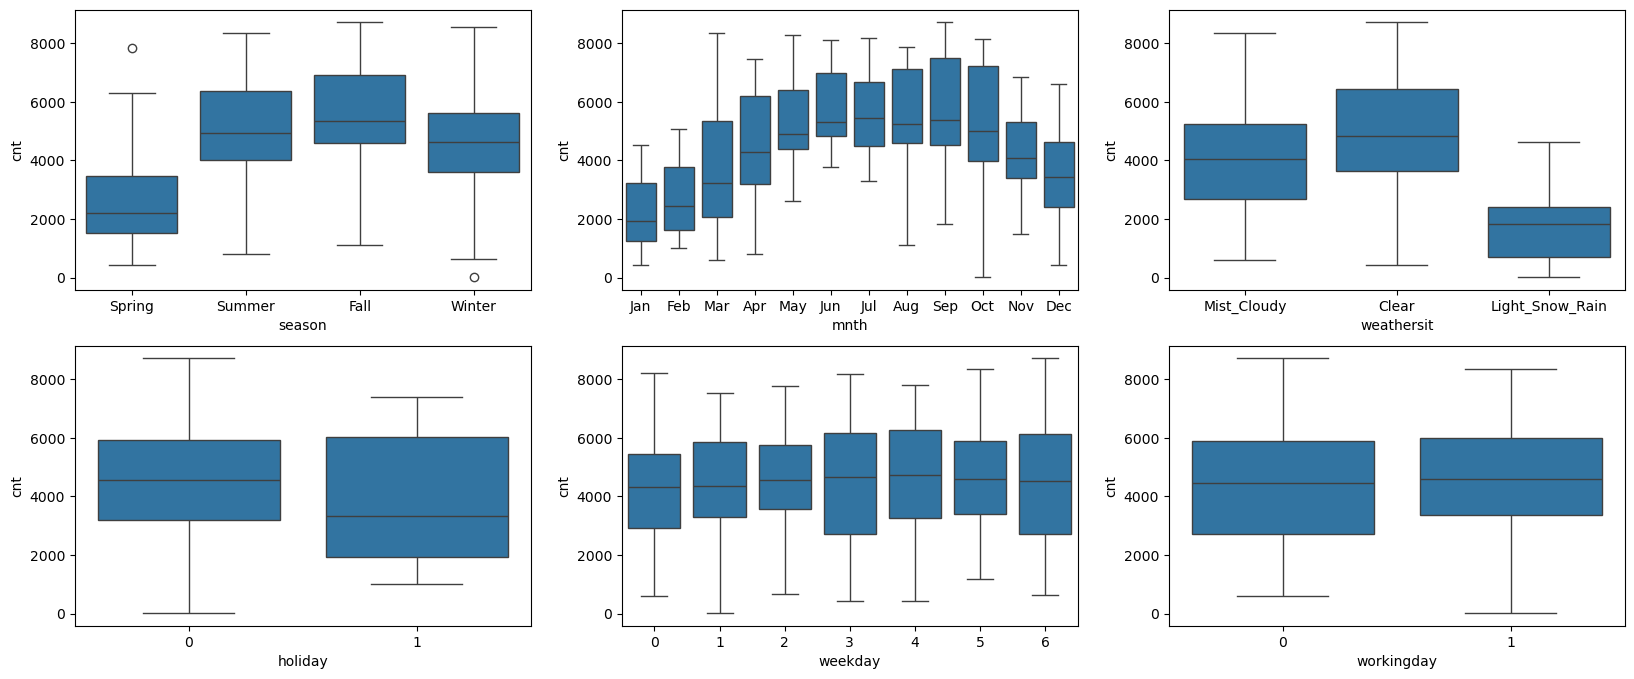

In [31]:
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =df_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =df_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =df_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_new)
plt.show()

**Interpretation from the Boxplot Analysis**

**There were six categorical variables in the dataset, and we used boxplots to examine their impact on the target variable 'cnt' (total bike bookings). Here are the key takeaways:**

**Season:**

**Around 32% of bike bookings occurred in season 3 (fall), with a median of over 5000 bookings across two years.**
**Season 2 (summer) and season 4 (winter) followed with 27% and 25% of total bookings, respectively.**
**This suggests that the season is a strong predictor for bike bookings.**

**Month (mnth):**

**Around 10% of bookings happened in the months of May, June, July, August, and September, with a median of over 4000 bookings per month.**
**This indicates that the month has a clear trend in bookings and could also be a good predictor.**

**Weather Situation (weathersit):**

**67% of bookings occurred in weather situation 1, with a median close to 5000 bookings.**
**Weather situation 2 accounted for 30% of bookings.**
**This shows that weather conditions influence bike bookings and can be a useful predictor.**

**Holiday:**

**97.6% of bookings happened when it was not a holiday.**
**This highly imbalanced distribution means holiday is not a useful predictor for bike bookings.**
**Weekday:**

**The distribution of bookings across weekdays was similar, with each day having around 13.5%-14.8% of total bookings, and medians between 4000-5000 bookings.**
**This suggests weekday may have minimal or no impact on bike bookings. The model can help decide whether it should be included.**

**Working Day:**

**About 69% of bookings occurred on working days, with a median close to 5000 bookings.**

**This indicates that working day can be an important predictor for bike bookings.**

**Conclusion:**

**Season, month, weathersit, and working day are strong predictors of bike bookings.**

**Holiday is not a useful predictor due to its bias.**

**Weekday may or may not influence bookings, and the model will decide its importance.**



# Correlation Matrix

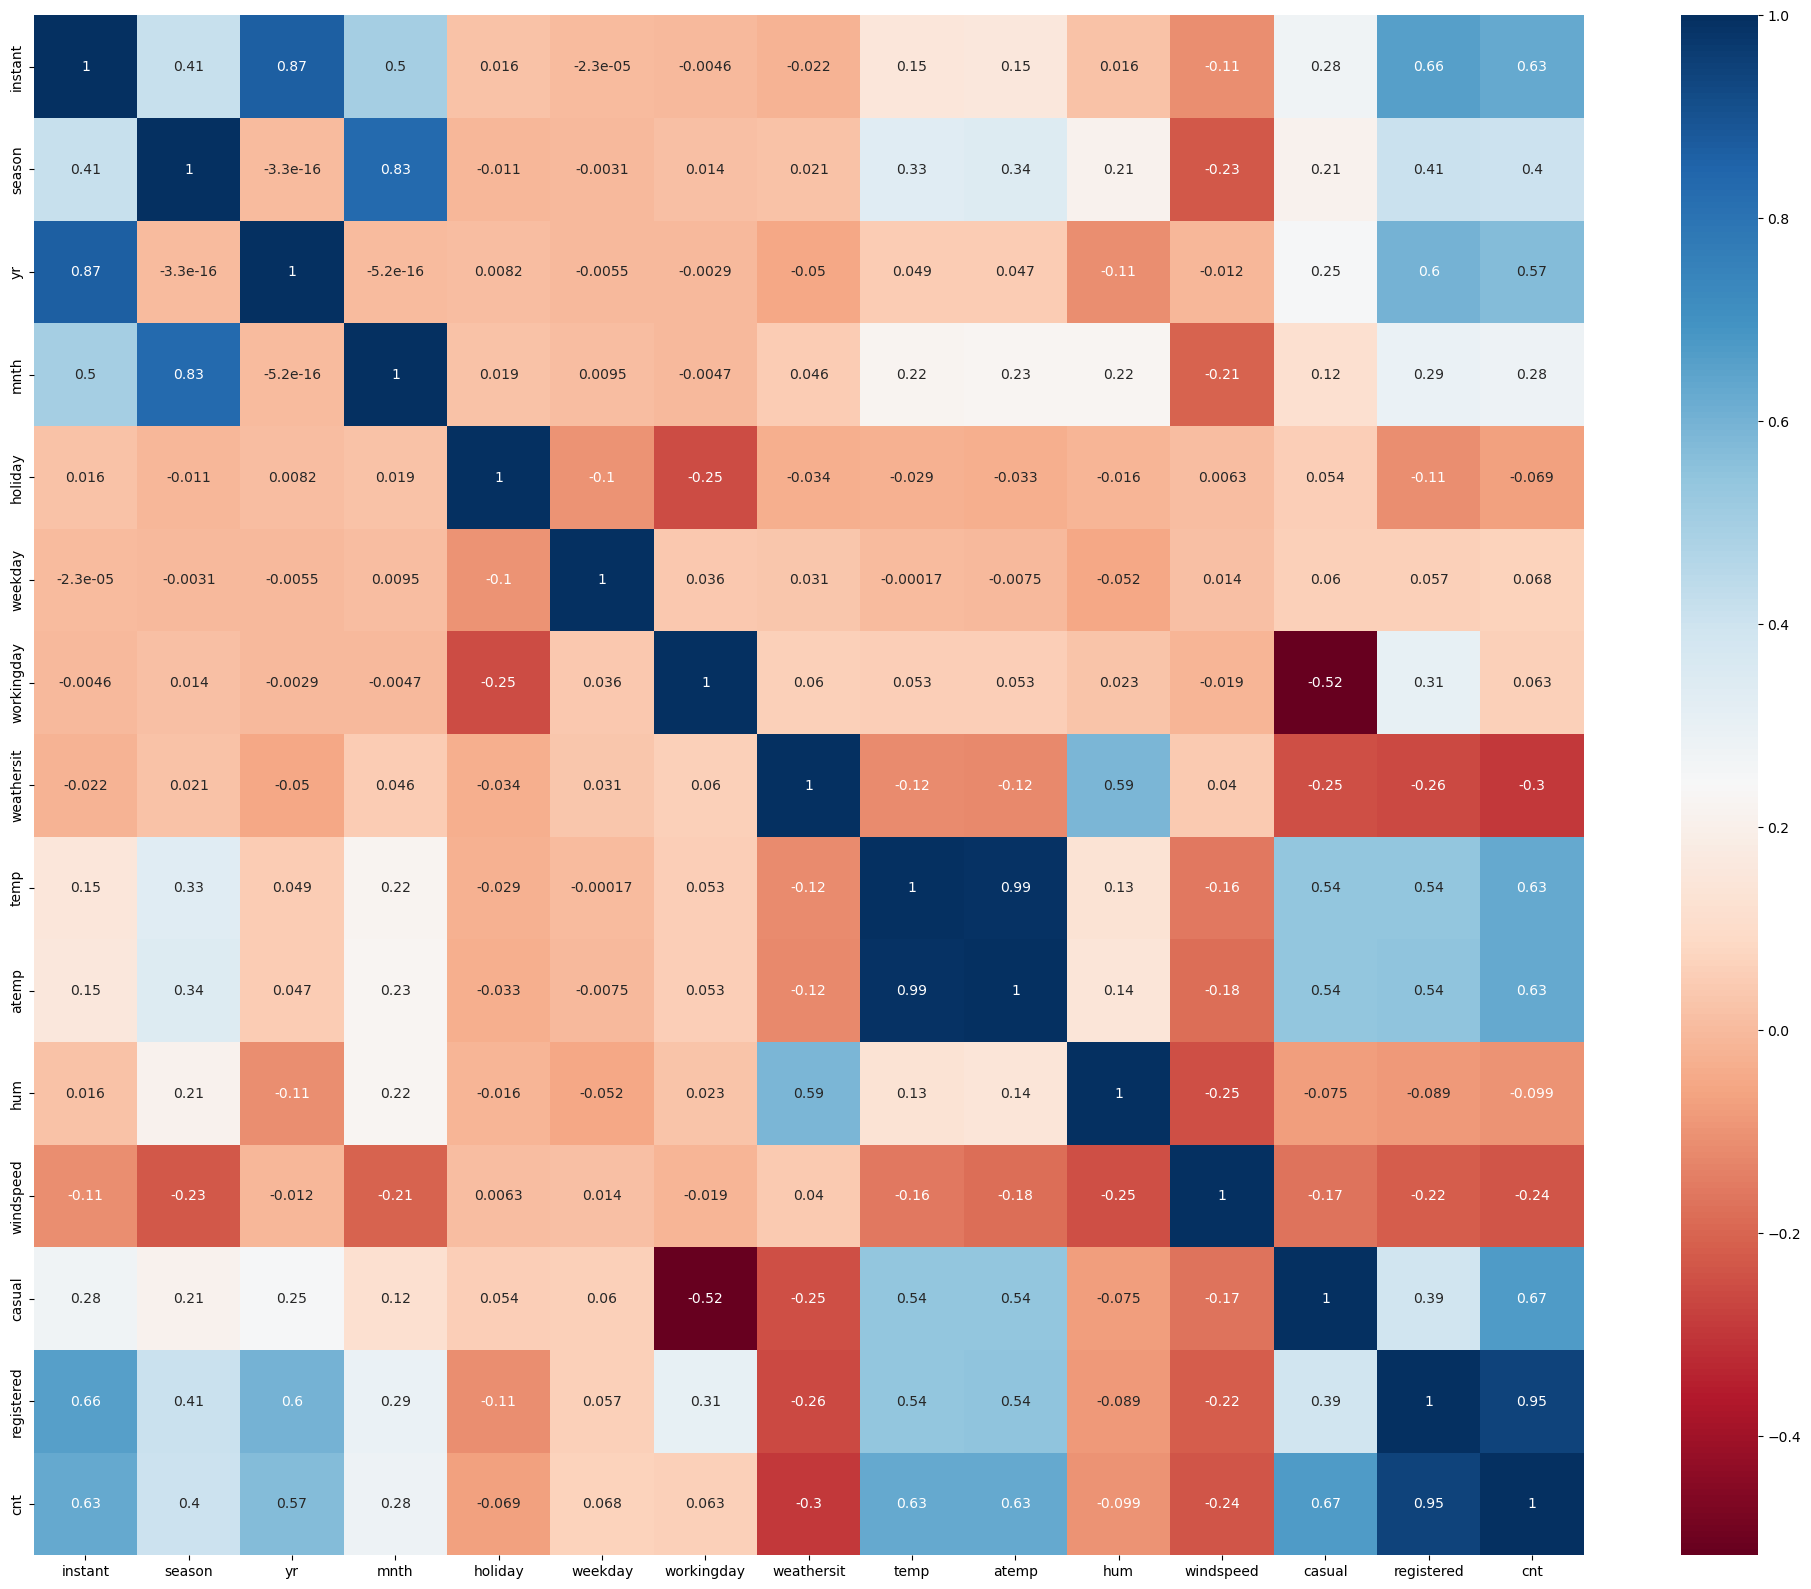

In [35]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

<Figure size 2500x2000 with 0 Axes>

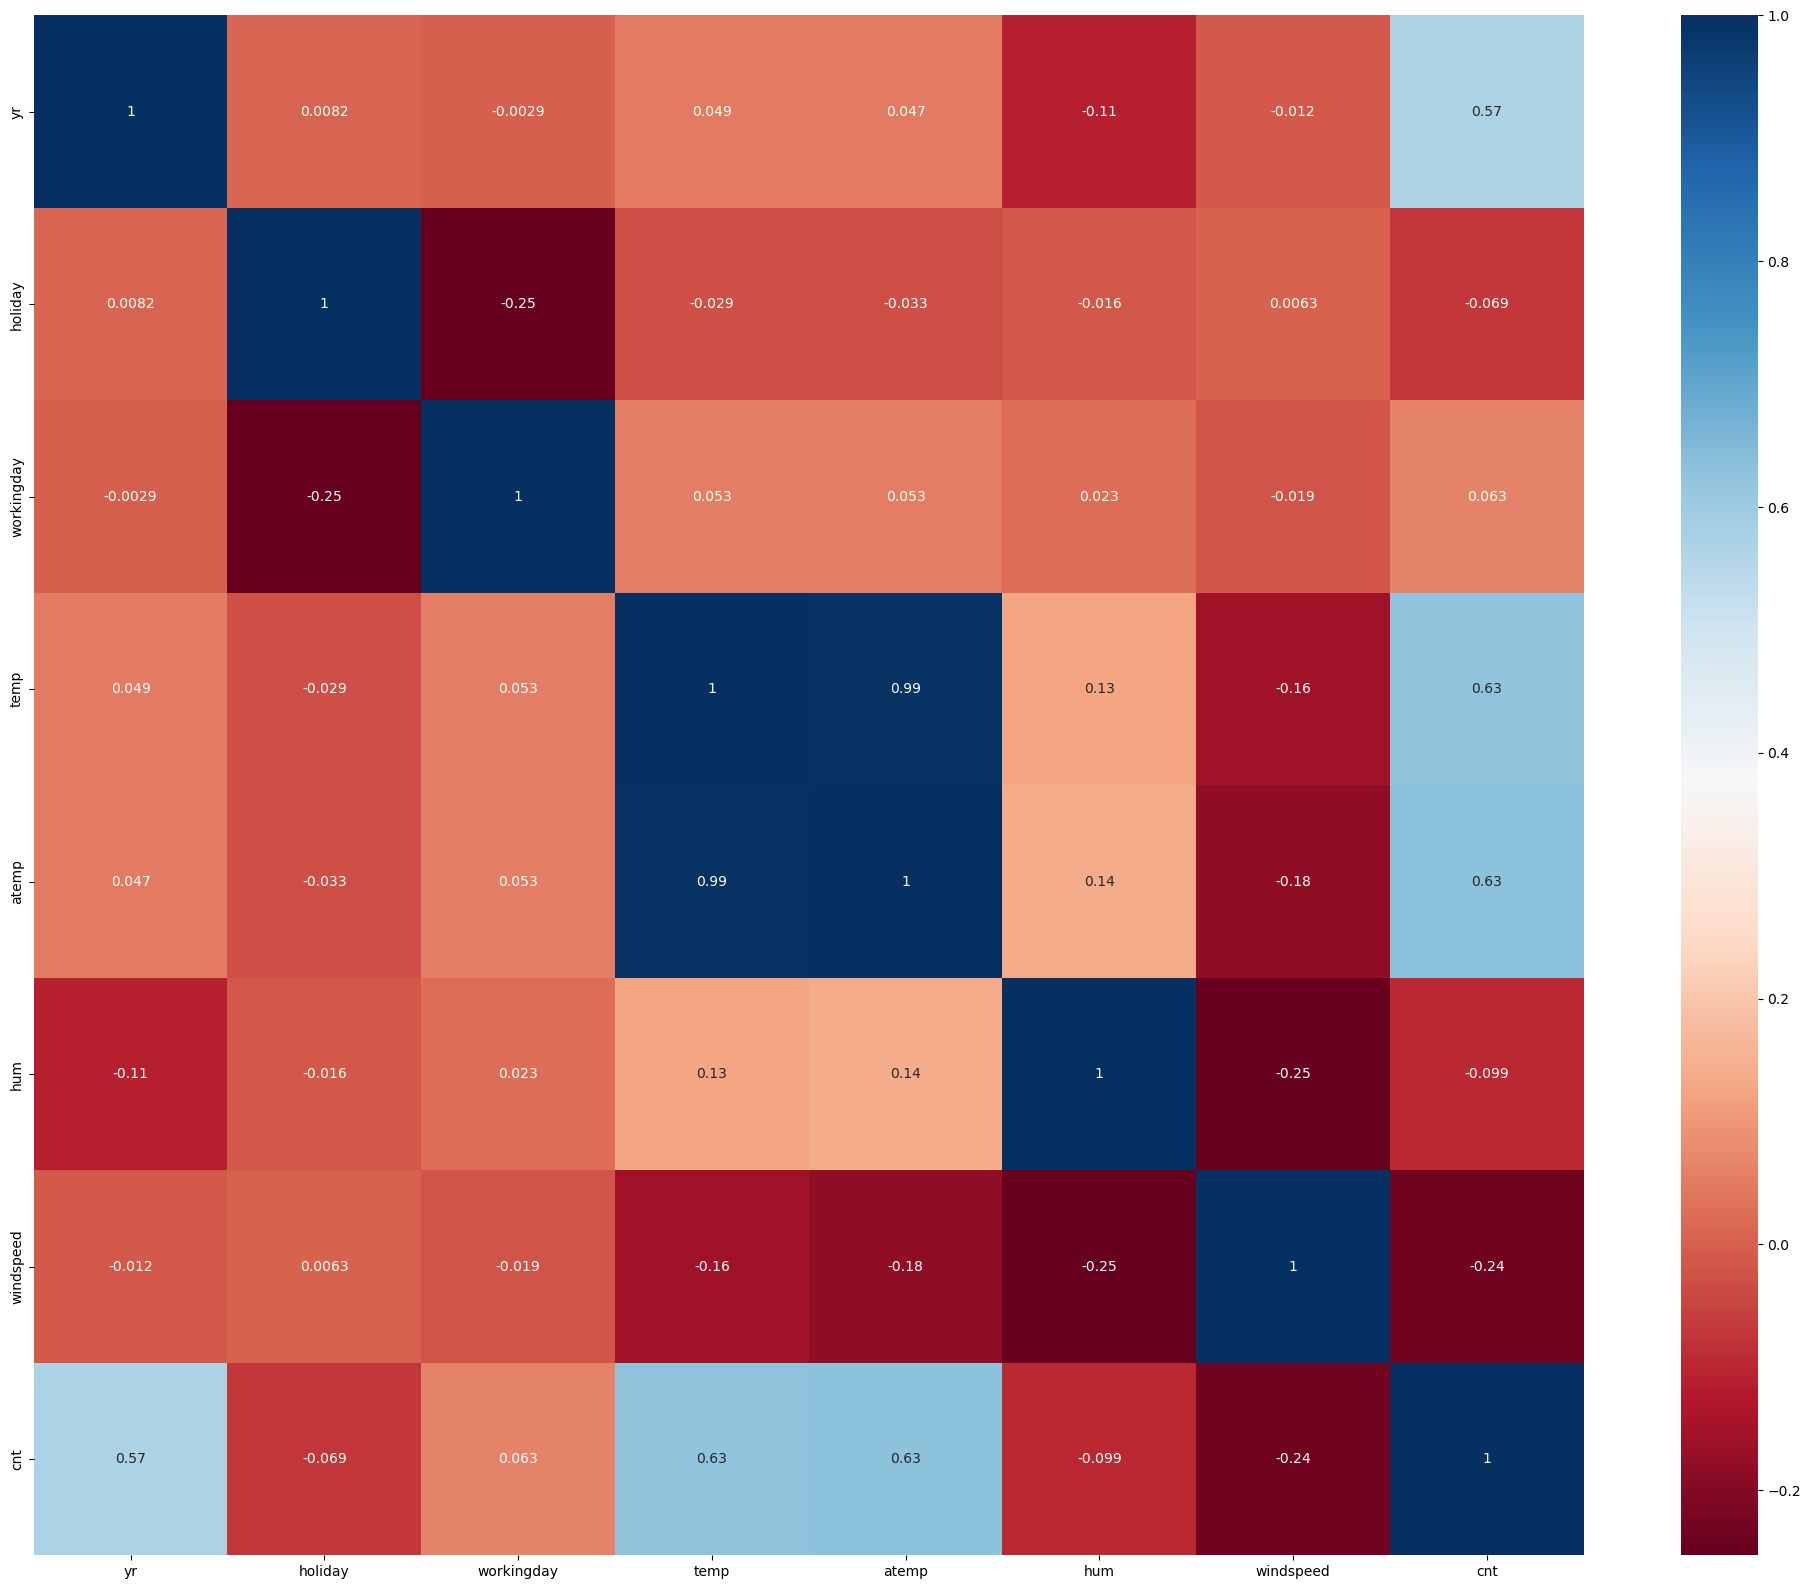

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: df_new) that were chosen for analysis

df_numeric = df_new.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(25, 20))
sns.heatmap(df_numeric.corr(), annot=True, cmap="RdBu")
plt.show()

**Interpretation:** 

**The heatmap provides a clear view of which variables are highly correlated with each other and which ones have strong correlations with the target variable. This will be useful when building the linear model, as we can refer back to it to validate the relationships between variables, using metrics like VIF (Variance Inflation Factor) and p-values. This will help us determine which variables to include or exclude from the model based on their correlation and statistical significance.**

# Generating dummy variables to represent categorical data in a numerical format

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

This below code does 3 things:
1) Create Dummy variable.
2) Drop original variable for which the dummy was created.
3) Drop first dummy variable for each set of dummies created.

In [41]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_Aug                    730 non-null    bool   
 12  mnth_Dec                    730 non-null    bool   
 13  mnth_Feb                    730 non

In [42]:
df_new.shape

(730, 30)

In [43]:
df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

# SPLITTING THE DATA

We will now divide the data into training and testing sets using a 70:30 ratio. To do this, we will use the train_test_split method from the sklearn package.

Check the shape & info before spliting

In [62]:
df_new.shape

(730, 30)

In [63]:
bool_cols = df_new.select_dtypes(include='bool').columns  # Boolean columns in df_new
df_new[bool_cols] = df_new[bool_cols].astype('uint8')  
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    uint8  
 9   season_Summer               730 non-null    uint8  
 10  season_Winter               730 non-null    uint8  
 11  mnth_Aug                    730 non-null    uint8  
 12  mnth_Dec                    730 non-null    uint8  
 13  mnth_Feb                    730 non

In [64]:
df_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
import sklearn
from sklearn.model_selection import train_test_split


We should set the random_state parameter to ensure that the train and test datasets always contain the same rows each time we split the data.

In [66]:
df_train, df_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    uint8  
 9   season_Summer               510 non-null    uint8  
 10  season_Winter               510 non-null    uint8  
 11  mnth_Aug                    510 non-null    uint8  
 12  mnth_Dec                    510 non-null    uint8  
 13  mnth_Feb                    510 non-nu

In [68]:
df_train.shape

(510, 30)

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   cnt                         219 non-null    int64  
 8   season_Spring               219 non-null    uint8  
 9   season_Summer               219 non-null    uint8  
 10  season_Winter               219 non-null    uint8  
 11  mnth_Aug                    219 non-null    uint8  
 12  mnth_Dec                    219 non-null    uint8  
 13  mnth_Feb                    219 non-nul

In [70]:
df_test.shape

(219, 30)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    uint8  
 9   season_Summer               510 non-null    uint8  
 10  season_Winter               510 non-null    uint8  
 11  mnth_Aug                    510 non-null    uint8  
 12  mnth_Dec                    510 non-null    uint8  
 13  mnth_Feb                    510 non-nu

In [72]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

**Looking at the data, we can conclude that the numerical variables are 'temp', 'atemp', 'hum', 'windspeed', and 'cnt'.**

**Now, let's create a pairplot to examine the relationships between these numerical variables.**




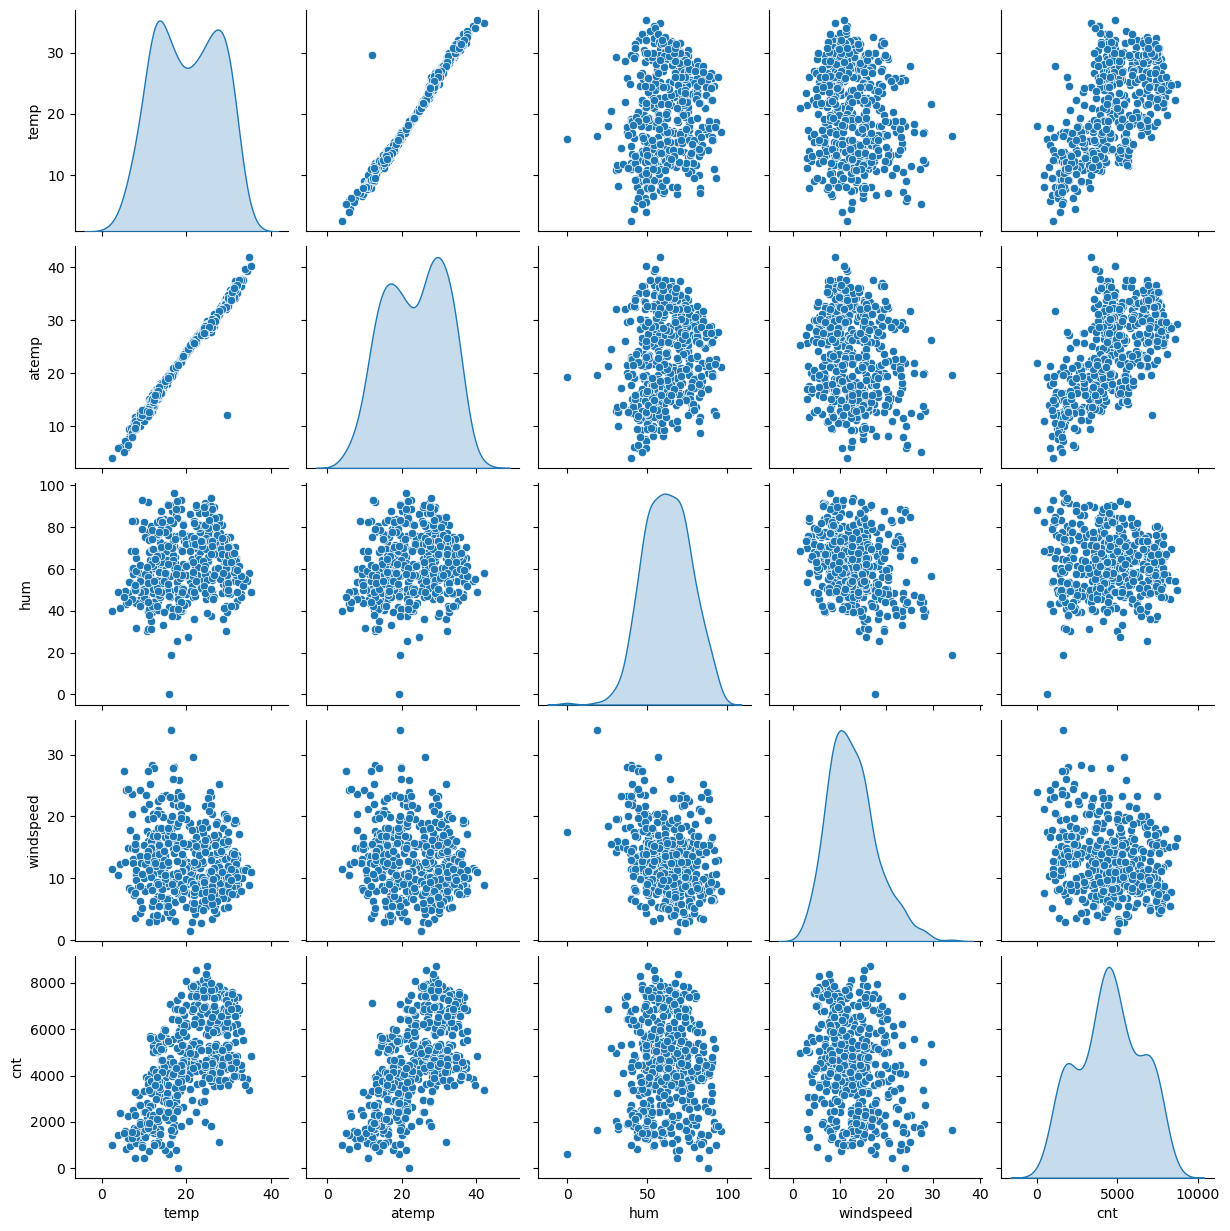

In [73]:
# Create a new dataframe of only numeric variables:

df_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

**The pair-plot above indicates a linear relationship between 'temp', 'atemp', and 'cnt'.**

<Figure size 1200x700 with 0 Axes>

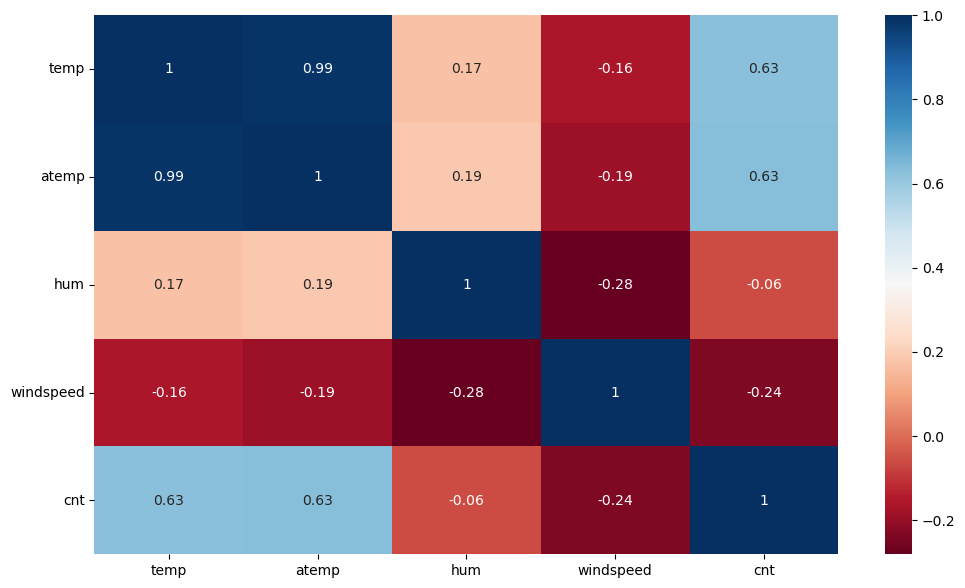

In [75]:
plt.figure(figsize = (12,7))
sns.heatmap(df_num.corr(), annot = True, cmap="RdBu")
#plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

**The above correlation plot indicates a strong correlation between 'temp' and 'atemp' with 'cnt', suggesting that changes in temperature have a significant impact on bike demand ('cnt').**

# RESCALING THE FEATURES

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [80]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [81]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.025490,0.341176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building

In [83]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

In [88]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [89]:
# Initialize the Linear Regression model
lm = LinearRegression()

# Initialize RFE with the Linear Regression model and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 13),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 11),
 ('mnth_Jan', False, 10),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 4),
 ('weekday_2', False, 8),
 ('weekday_3', False, 6),
 ('weekday_4', False, 7),
 ('weekday_5', False, 5),
 ('weekday_6', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weekday_6', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [92]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using STATS MODEL


# Model - 1

VIF Check

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,353.99
2,atemp,351.62
3,hum,22.90
4,windspeed,5.15
6,season_Winter,2.75
5,season_Spring,2.68
14,weathersit_Mist_Cloudy,2.26
0,yr,2.05
10,mnth_Nov,1.83
8,mnth_Jul,1.41


In [95]:
import statsmodels.api as sm

In [96]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [97]:
# Check the parameters obtained

lr1.params

const                         0.360643
yr                            0.229045
temp                          0.327628
atemp                         0.138868
hum                          -0.170456
windspeed                    -0.184512
season_Spring                -0.124363
season_Winter                 0.077731
mnth_Dec                     -0.040935
mnth_Jul                     -0.054367
mnth_Mar                      0.048370
mnth_Nov                     -0.058427
mnth_Sep                      0.060833
weekday_6                     0.023050
weathersit_Light_Snow_Rain   -0.260751
weathersit_Mist_Cloudy       -0.046952
dtype: float64

In [98]:
# Print a summary of the linear regression model obtained
print(lr1.summary())
         

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.08e-183
Time:                        11:04:54   Log-Likelihood:                 502.27
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     494   BIC:                            -904.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 2

We are removing the variable 'atemp' due to its extremely high Variance Inflation Factor (VIF) value. Although 'atemp' has the second-highest VIF, we chose to drop it instead of 'temp' based on domain knowledge. Temperature is considered a more critical factor for a business like bike rentals, making it essential to retain 'temp' in the model.

In [99]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

VIF Check

In [101]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.47
1,temp,15.82
3,windspeed,5.03
5,season_Winter,2.72
4,season_Spring,2.67
13,weathersit_Mist_Cloudy,2.26
0,yr,2.05
9,mnth_Nov,1.82
7,mnth_Jul,1.41
6,mnth_Dec,1.40


In [102]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [103]:
lr2.params

const                         0.363239
yr                            0.229046
temp                          0.455832
hum                          -0.168323
windspeed                    -0.189392
season_Spring                -0.124722
season_Winter                 0.078848
mnth_Dec                     -0.041033
mnth_Jul                     -0.054433
mnth_Mar                      0.049063
mnth_Nov                     -0.058988
mnth_Sep                      0.059970
weekday_6                     0.023227
weathersit_Light_Snow_Rain   -0.261902
weathersit_Mist_Cloudy       -0.047326
dtype: float64

In [104]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.31e-184
Time:                        11:15:04   Log-Likelihood:                 501.74
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     495   BIC:                            -910.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 3

Based on above analysis, we prioritize removing variables with very high VIF values, starting with 'hum', to improve model performance and interpretability.



In [105]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,5.00
4,season_Winter,2.35
0,yr,2.04
3,season_Spring,1.90
8,mnth_Nov,1.80
12,weathersit_Mist_Cloudy,1.53
6,mnth_Jul,1.37
5,mnth_Dec,1.34
7,mnth_Mar,1.22


In [107]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [108]:
# Check the parameters obtained

lr3.params

const                         0.268588
yr                            0.233359
temp                          0.426568
windspeed                    -0.154471
season_Spring                -0.126408
season_Winter                 0.073031
mnth_Dec                     -0.050360
mnth_Jul                     -0.047280
mnth_Mar                      0.055023
mnth_Nov                     -0.058744
mnth_Sep                      0.054855
weekday_6                     0.022821
weathersit_Light_Snow_Rain   -0.311736
weathersit_Mist_Cloudy       -0.075200
dtype: float64

In [109]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.34e-181
Time:                        11:17:29   Log-Likelihood:                 491.83
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     496   BIC:                            -896.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 4

We are removing the variable 'windspeed' because it has a high VIF value, which suggests it may cause multicollinearity issues in the model.

Although 'temp' also has a high VIF, we chose to keep it instead of 'windspeed' because temperature is generally a more important factor for bike rentals. People are more likely to rent bikes based on temperature rather than wind speed.

Therefore, to maintain the model's accuracy and focus on meaningful variables, we decided to drop 'windspeed' and retain 'temp'.

In [110]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

In [111]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.94
3,season_Winter,2.34
0,yr,2.02
7,mnth_Nov,1.75
11,weathersit_Mist_Cloudy,1.52
2,season_Spring,1.46
4,mnth_Dec,1.34
5,mnth_Jul,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.21


In [112]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()


In [113]:
# Check the parameters obtained

lr4.params

const                         0.202871
yr                            0.231028
temp                          0.444312
season_Spring                -0.126726
season_Winter                 0.085769
mnth_Dec                     -0.044757
mnth_Jul                     -0.040682
mnth_Mar                      0.054501
mnth_Nov                     -0.064701
mnth_Sep                      0.061484
weekday_6                     0.020299
weathersit_Light_Snow_Rain   -0.328105
weathersit_Mist_Cloudy       -0.073264
dtype: float64

In [114]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.49e-176
Time:                        11:19:26   Log-Likelihood:                 475.76
No. Observations:                 510   AIC:                            -925.5
Df Residuals:                     497   BIC:                            -870.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model - 5

All Variables VIF values are well below 5. The 'weekday_6' variable having its High P-value 0.091 which is higher than 0.05 hence I drop this variable.

In [116]:
X_train_new = X_train_new.drop(["weekday_6"], axis=1)
print(X_train_new.columns)

Index(['yr', 'temp', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jul',
       'mnth_Mar', 'mnth_Nov', 'mnth_Sep', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')


VIF Check

In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.86
3,season_Winter,2.34
0,yr,2.02
7,mnth_Nov,1.75
10,weathersit_Mist_Cloudy,1.52
2,season_Spring,1.43
4,mnth_Dec,1.34
5,mnth_Jul,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.21


In [118]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [119]:
# Check the parameters obtained

lr5.params

const                         0.208006
yr                            0.231005
temp                          0.441121
season_Spring                -0.127178
season_Winter                 0.084582
mnth_Dec                     -0.044165
mnth_Jul                     -0.039964
mnth_Mar                      0.053580
mnth_Nov                     -0.064146
mnth_Sep                      0.062380
weathersit_Light_Snow_Rain   -0.328180
weathersit_Mist_Cloudy       -0.073507
dtype: float64

In [121]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.56e-176
Time:                        11:34:07   Log-Likelihood:                 474.29
No. Observations:                 510   AIC:                            -924.6
Df Residuals:                     498   BIC:                            -873.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**This model appears to be well-constructed, exhibiting very low multicollinearity among the predictors. Additionally, the p-values for all predictors are statistically significant. Therefore, we will provisionally consider this as our final model, provided that the metrics on the test data closely align with these results.**

# Final Model Interpretation




The lr5 model summary clearly shows that all coefficients are statistically significant and not equal to zero. This implies that we reject the null hypothesis for each predictor.


The multiple linear regression model effectively explains 81.7% (R² = 0.817) of the variance in bike demand ('cnt'), indicating a strong fit.

Significant Predictors:

Temperature (temp): Positive correlation—higher temperatures increase bike demand.

Year (yr): Demand has grown over time.

Seasonal Effects:

Spring: Lower demand compared to other seasons.

Winter: Slightly higher demand.

Monthly Trends:

Demand drops in November and December but rises in March and September.

Weather Impact:

Rain/Snow significantly reduces demand, while Mist/Cloudy has a smaller negative effect. Model Significance:

F-statistic (p < 0.001): The model as a whole is statistically significant. Residual Diagnostics:

No autocorrelation issues (Durbin-Watson = 2.001).

Some deviations from normality in residuals, requiring further analysis.



The model provides meaningful insights into factors influencing bike demand and can help in forecasting trends. However, residual analysis suggests further refinements or transformations might be beneficial for improved predictions.

# ASSUMPTIONS

Error terms are normally distributed with mean zero (not X, Y)

Residual Analysis Of Training Data

In [123]:
y_train_pred = lr5.predict(X_train_lm5)

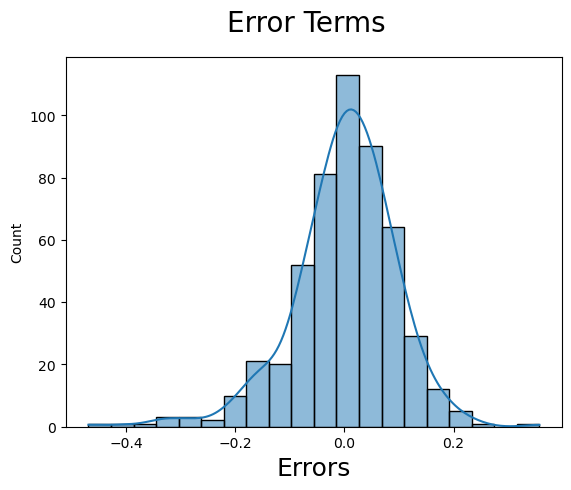

In [126]:
res = y_train - y_train_pred
fig = plt.figure()
sns.histplot(res, bins=20, kde=True)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()                        # X-label

The histogram above indicates that the residuals follow a normal distribution, validating the assumption of normality required for linear regression.

There is a linear relationship between X and Y

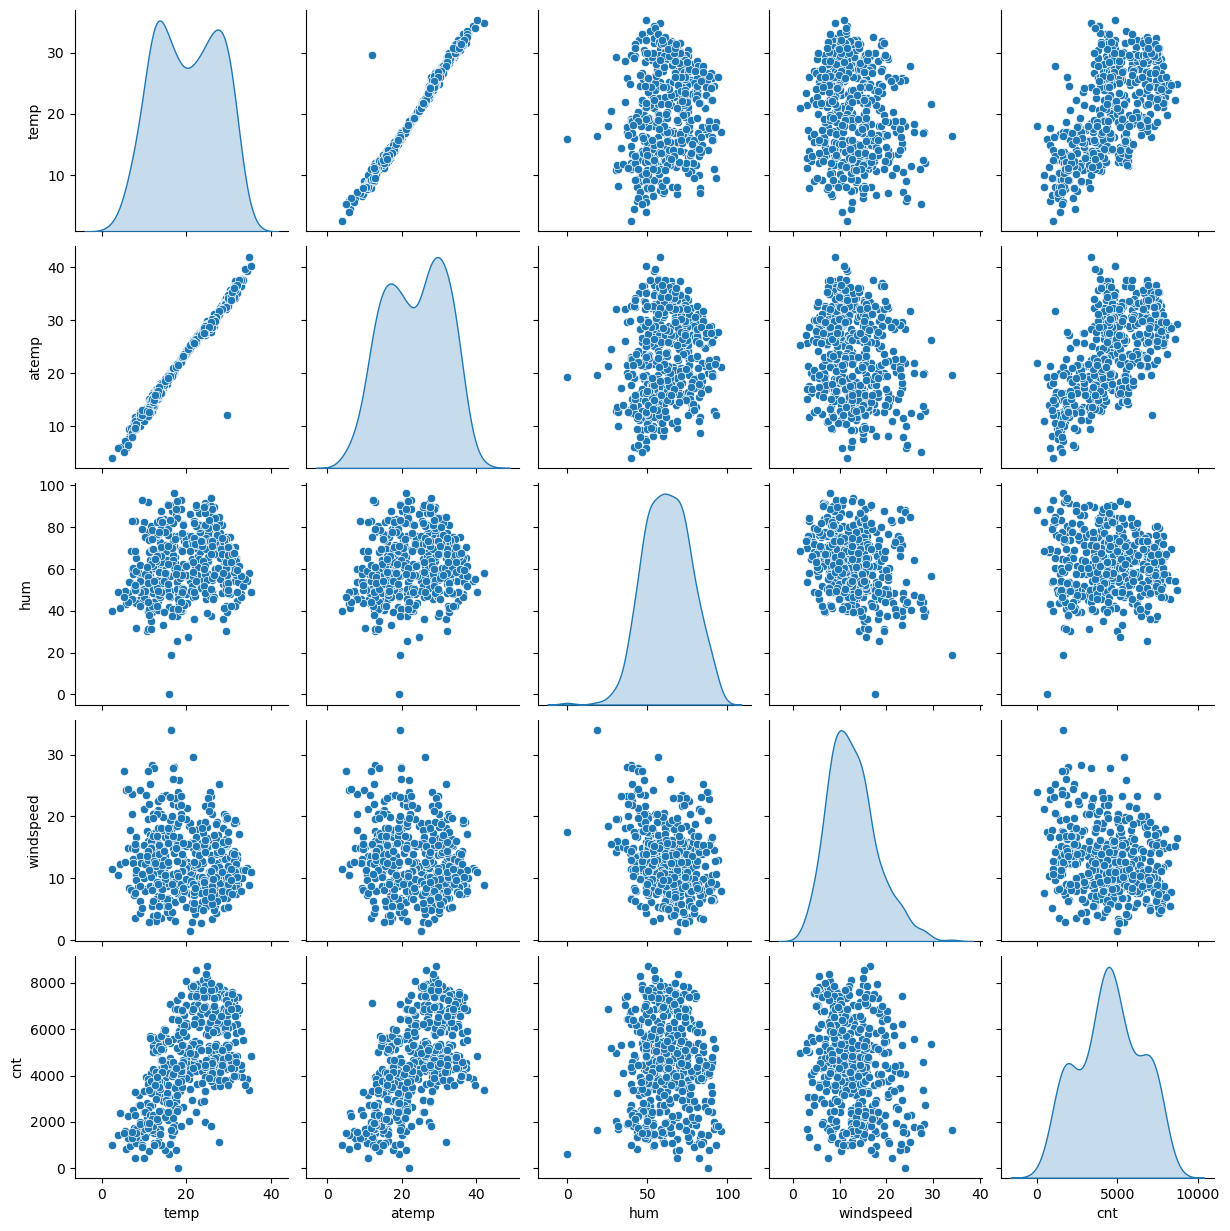

In [130]:
df_new=df_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

# There is a linear relationship between X and Y

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.86
3,season_Winter,2.34
0,yr,2.02
7,mnth_Nov,1.75
10,weathersit_Mist_Cloudy,1.52
2,season_Spring,1.43
4,mnth_Dec,1.34
5,mnth_Jul,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.21


**The features in this model all have VIF values less than 5, suggesting that multicollinearity is not a concern and that these predictors are reasonably independent of one another.**

# Generating predictions with the final model.

**Now that the model has been fitted and the assumptions have been validated, we can proceed with making predictions using the final model (lr5). This involves applying scaling to the test data before generating predictions.**



In [134]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [135]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,0,1


In [136]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.086758,0.082192,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.036530,0.324201
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.282125,0.275286,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X_test and y_test**

In [137]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   season_Spring               219 non-null    uint8  
 8   season_Summer               219 non-null    uint8  
 9   season_Winter               219 non-null    uint8  
 10  mnth_Aug                    219 non-null    uint8  
 11  mnth_Dec                    219 non-null    uint8  
 12  mnth_Feb                    219 non-null    uint8  
 13  mnth_Jan                    219 non-nul

In [138]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   season_Spring               219 non-null    uint8  
 4   season_Winter               219 non-null    uint8  
 5   mnth_Dec                    219 non-null    uint8  
 6   mnth_Jul                    219 non-null    uint8  
 7   mnth_Mar                    219 non-null    uint8  
 8   mnth_Nov                    219 non-null    uint8  
 9   mnth_Sep                    219 non-null    uint8  
 10  weathersit_Light_Snow_Rain  219 non-null    uint8  
 11  weathersit_Mist_Cloudy      219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(9)
memory usage: 8.8 KB


In [139]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

# MODEL EVALUATION

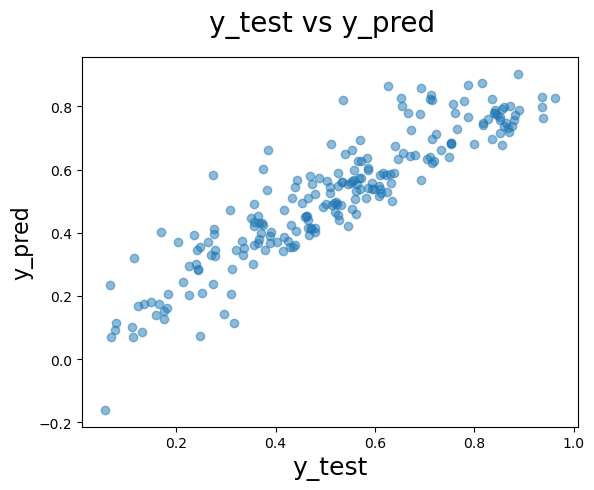

In [140]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# R^2 Value for TEST

In [141]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.8246024047678726

# Adjusted R^2 Value for TEST

In [142]:
# We already have the value of R^2 (calculated in above step)

r2=0.8246024047678726


In [143]:
# Get the shape of X_test
X_test.shape

(219, 11)

In [144]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8152817596106098

# Comparison of Final Results

Train R^2 :0.818 Train Adjusted R^2 :0.814 Test R^2 :0.824 Test Adjusted R^2 :0.815 This seems to be a really good model that can very well 'Generalize' various datasets.

Your model is performing well based on several important factors:

R² Value (0.8246): This means the model explains about 82.46% of the variation in bike rentals (cnt). This is a strong result, suggesting the model captures the key factors that affect bike rentals.

Adjusted R² Value (0.814): This value is also high and takes into account the number of predictors in the model. It shows that the model is not overfitting, meaning it's generalizing well and not just memorizing the training data.

Significance of Variables: The predictors in the model, like temp and season_Spring, have very low p-values, indicating that they are statistically significant and contribute meaningfully to predicting bike rentals.

Model Simplicity: You've removed variables with high correlations (e.g., atemp, windspeed), which makes the model more reliable and less prone to errors caused by multicollinearity.

Conclusion: Overall, our model is good, with strong performance on both the training and test data. It is capturing the main factors affecting bike rentals, and its predictions are statistically valid. You can be confident in its ability to make accurate predictions.



# FINAL REPORT


FINAL REPORT Based on the final model, the top three predictor variables that most influence bike bookings are as follows:

1) Temperature (temp):
Coefficient: 0.4411 Impact: Each increase in temperature boosts bike rentals by 0.4411 units.

Conclusion: Higher temperatures lead to more rentals, so it's essential to factor in seasonal temperature changes.

2) Weather Situation 3 (weathersit_3):
Coefficient: -0.3282 Impact: Inclement weather (e.g., snow, rain, thunderstorms) decreases bike rentals by 0.3282 units.

Conclusion: Poor weather reduces demand, and forecasts should be considered for planning.

3) Year (yr):
Coefficient: 0.2310

Impact: Each year sees a 0.2310 increase in bike rentals.

Conclusion: Bike rentals are growing year over year, indicating a positive trend for future demand.

Conclusion: Over time, bike rentals are expected to increase, possibly due to growing popularity or improved services. This trend should be factored into long-term planning.

